# **Importacion de datos y division**

Utilizando la division de datos mas comun (conocida tambien como ley de pareto) fue que creamos dos "datasets" distintos, uno para entrenamiento y el otro para el proceso de validacion


Ley de Pareto:

- 80% Training Data

- 20% Test Data

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

#Cargamos el dataset ya filtrado
df = pd.read_excel('/content/Dataset_Preprosesado_V1.xlsx')

#Separamos las variables de prediccion del objetivo
X = df.drop(columns=['calidad_auto'])
y = df['calidad_auto']

#Realmente estas lineas no hacen nada, pero lo que harian seria transformar los objetivos a numeros, cosa que ya esta hecha en el excel
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Separacion en 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# **Fase de Entrenamiento**

Definimos una Red Neuronal con una arquitectura de tipo Multilayer Perceptron (MLP), teniendo la siguiente estructura de capas:

- 128 Neuronas, ActuvationFunction = Relu
- 64 Neuronas, ActuvationFunction = Relu
- 32 Neuronas, ActuvationFunction = Relu
- 3 Neuronas, ActuvationFunction = Softmax

Luego se aplico el optimizador de adam (por default)

Y se utilizo una loss function de **"sparse_categorical_crossentropy"** esto debido a que son de las mas recomendadas para problemas de clasificacion

In [22]:
#Se construye la arquitectura mencionada
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases: Alta, Media, Baja
])

#Compilamos el modelo con su optimizador y su LF
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenamos y guardamos para despues poder graficar
history = model.fit(X_train, y_train, epochs= 100, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Analisis de Resultados**

Comenzamos creando una grafica sencilla y clara en la que podemos ver nuestra curva de mejora a travez de los Epochs

Otras cosas que hicimos para asegurarnos que el modelo no estuviera cayendo dentro del overfitting o en general para hacer un mejor analisis de su precision fue:

- Utilizar la funcion de evaluate
- Observamos los valores de recall, f1_score, y support


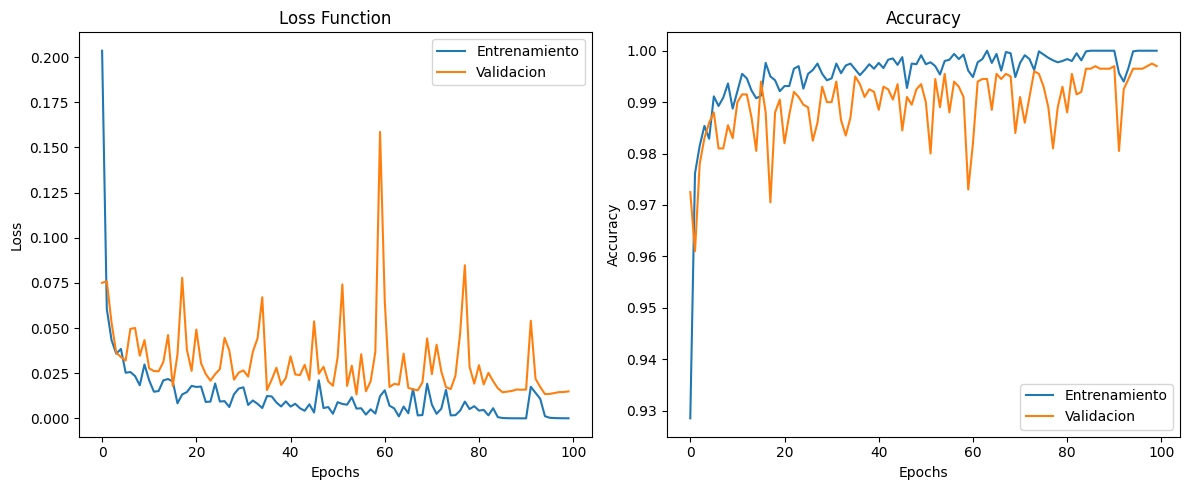

In [26]:
#Graficas de loss y accuracy
plt.figure(figsize=(12, 5))

#Loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validacion')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0117


[0.014944036491215229, 0.996999979019165]

In [25]:
from sklearn.metrics import classification_report
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       1.00      1.00      1.00      1680
           2       1.00      0.99      0.99       210

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

